# CSPB 4502 - Final Project - Project Wildfire
### Group 3 - Natalie Dreher, Ronald Durham, and Grant Fairbairn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df0 = pd.read_csv("firesCleaned_0.csv")
df1 = pd.read_csv("firesCleaned_1.csv")
df2 = pd.read_csv("firesCleaned_2.csv")
df3 = pd.read_csv("firesCleaned_3.csv")

In [3]:
# Visualizing the dataframe for the first 500K entries
df0

,Fire Size Class,Fire Year,Owner Code,Owner Descr,Stat Cause Code,Stat Cause Descr,State,Cont Date,Cont Doy,Cont Time,Discovery Date,Discovery Doy,Discovery Time,Fire Size,Latitude,Longitude,Objectid
0,A,2000,1,BLM,1,Lightning,CO,2451724.5,181.0,1235.0,2451723.5,180,1556.0,0.10,37.321900,-108.443700,351622
1,A,2000,1,BLM,1,Lightning,CO,2451757.5,214.0,1400.0,2451757.5,214,1300.0,0.10,37.250600,-108.345100,351635
2,A,2000,1,BLM,1,Lightning,UT,2451752.5,209.0,1600.0,2451751.5,208,1700.0,0.10,38.533350,-109.797600,353105
3,A,2001,1,BLM,1,Lightning,CO,2452092.5,183.0,1400.0,2452091.5,182,1000.0,0.20,37.230000,-108.327300,351654
4,A,2001,1,BLM,1,Lightning,CO,2452098.5,189.0,30.0,2452097.5,188,2000.0,0.10,40.244280,-108.923400,351443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.13,34.434653,-83.176685,436422
499996,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.14,31.337671,-82.847888,442220
499997,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454087.5,352,NaN,0.22,32.505170,-82.607000,438068
499998,A,2006,14,MISSING/NOT SPECIFIED,5,Debris Burning,GA,NaN,NaN,NaN,2454088.5,353,NaN,0.01,31.422744,-82.730918,442837


In [4]:
# Creating smaller dataframes to analyze

df0Year = df0['Fire Year']
df1Year = df1['Fire Year']
df2Year = df2['Fire Year']
df3Year = df3['Fire Year']

In [5]:
dfYear1 = pd.concat([df0Year, df1Year])
dfYear2 = pd.concat([df2Year, df3Year])

# Deleting subparts as we go to save memory
del df0Year
del df1Year
del df2Year
del df3Year

In [6]:
dfYear = pd.concat([dfYear1, dfYear2])
del dfYear1
del dfYear2

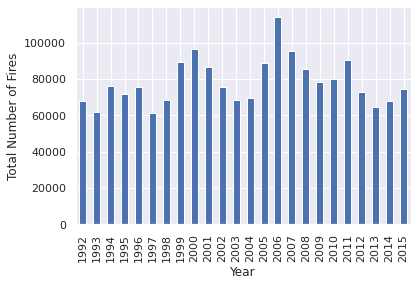

In [8]:
dfYear.value_counts().sort_index().plot(kind='bar');
plt.xlabel("Year");
plt.ylabel("Total Number of Fires");

In [9]:
df0CauseCode = df0['Stat Cause Code']
df1CauseCode = df1['Stat Cause Code']
df2CauseCode = df2['Stat Cause Code']
df3CauseCode = df3['Stat Cause Code']

In [10]:
dfCauseCode1 = pd.concat([df0CauseCode, df1CauseCode])
dfCauseCode2 = pd.concat([df2CauseCode, df3CauseCode])
del df0CauseCode
del df1CauseCode
del df2CauseCode
del df3CauseCode

In [11]:
dfCauseCode = pd.concat([dfCauseCode1, dfCauseCode2])
del dfCauseCode1
del dfCauseCode2

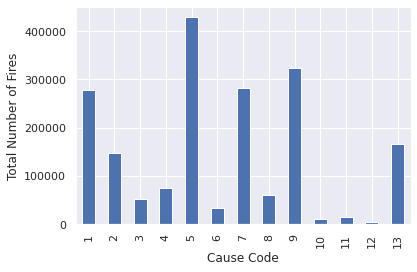

In [12]:
dfCauseCode.value_counts().sort_index().plot(kind='bar');
plt.xlabel("Cause Code");
plt.ylabel("Total Number of Fires");

In [13]:
df0YearCause = df0[['Fire Year','Stat Cause Code']]
df1YearCause = df1[['Fire Year','Stat Cause Code']]
df2YearCause = df2[['Fire Year','Stat Cause Code']]
df3YearCause = df3[['Fire Year','Stat Cause Code']]

In [14]:
dfYearCause1 = pd.concat([df0YearCause, df1YearCause])
dfYearCause2 = pd.concat([df2YearCause, df3YearCause])
dfYearCause = pd.concat([dfYearCause1, dfYearCause2])
del df0YearCause
del df1YearCause
del df2YearCause
del df3YearCause
del dfYearCause1
del dfYearCause2

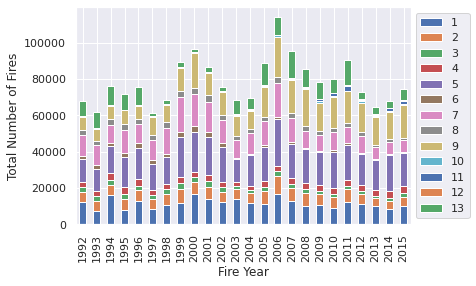

In [16]:
ax = pd.crosstab(dfYearCause['Fire Year'], dfYearCause['Stat Cause Code']).plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Total Number of Fires");

In [17]:
# Setting up similar stacked bar graph with cause descriptions 

df0YearDescr = df0[['Fire Year','Stat Cause Descr']]
df1YearDescr = df1[['Fire Year','Stat Cause Descr']]
df2YearDescr = df2[['Fire Year','Stat Cause Descr']]
df3YearDescr = df3[['Fire Year','Stat Cause Descr']]

In [18]:
dfYearDescr1 = pd.concat([df0YearDescr, df1YearDescr])
dfYearDescr2 = pd.concat([df2YearDescr, df3YearDescr])
dfYearDescr = pd.concat([dfYearDescr1, dfYearDescr2])
del df0YearDescr
del df1YearDescr
del df2YearDescr
del df3YearDescr
del dfYearDescr1
del dfYearDescr2

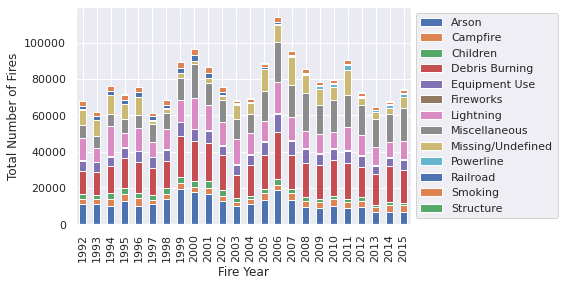

In [19]:
ax = pd.crosstab(dfYearDescr['Fire Year'], dfYearDescr['Stat Cause Descr']).plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Total Number of Fires");

In [20]:
#working on isolating long and lat for heatmap

In [21]:
df0Geo = df0[['Latitude', 'Longitude']]
df1Geo = df1[['Latitude', 'Longitude']]
df2Geo = df2[['Latitude', 'Longitude']]
df3Geo = df3[['Latitude', 'Longitude']]

In [22]:
dfGeo1 = pd.concat([df0Geo, df1Geo])
dfGeo2 = pd.concat([df2Geo, df3Geo])
dfGeo = pd.concat([dfGeo1, dfGeo2])